<div style="display: flex; justify-content: center;">
    <img src="../images/Logo-personal_Fondo_blanco.png" alt="Logo_personal" /> 
</div>
<p align="center">
  <h1 align="center">"credit card fraud predictive model with decision tree and random forest"<h1>
</p>

---

## Introduction
This project aims to generate a binomial logistic regression model to classify, based on an examination, whether cancer is benign or malignant.

The work is carried out based on analysis, compression, data cleaning, metrics, testing and validation of the model, with the following work path:

- Development
- Understanding the data
- Data cleaning
  - Check null values
- Correlation analysis
- Data standardization:
- Exploratory data analysis
- Model creation
  - Split training and test data
  - Create and train the model
  - Evaluate the accuracy of the model with metrics
  - Evaluate the model with cross validation
- Analysis of results
  - Get the probabilities
  - Get the coefficients
  - Confusion Matrix
- Test
  - Test eliminating the characteristics with lower coefficients
  - Test balancing the number of class records with SMOTE
- Regularizers
  - L1 Lasso
  - L2 Ridge
- Conclusions

## Data
The Data set ["Breast Cancer Wisconsin (Diagnostic)"](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) of kaggel contains Predict whether the cancer is benign or malignant. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

**Attribute Information:**

* ID number
* Diagnosis (M = malignant, B = benign)
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)


Explicación de la característica:

Distance_from_home: la distancia desde el hogar donde se realizó la transacción.

Distance_from_last_transaction: la distancia desde la última transacción realizada.

ratio_to_median_purchase_price: relación entre el precio de compra de la transacción y el precio de compra medio.

repetir_retailer: ¿la transacción se realizó en el mismo minorista?

used_chip - Es la transacción a través de chip (tarjeta de crédito).

used_pin_number: ¿la transacción se realizó utilizando el número PIN?

online_order: ¿Es la transacción un pedido en línea?

Fraude: ¿Es la transacción fraudulenta?
___

## Development
#### Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
print('Imported libraries')

Imported libraries


#### Import the dataset

In [4]:
df = pd.read_csv("../data/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

#### Check null values

In [32]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

#### Distribution of predictor classes

In [31]:
print("Number of registers:", df["fraud"].value_counts())

Number of registers: fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


The dataset is unbalanced in its predictive class. It is ideal to balance the dominant class [0 - No fraud] by randomly deleting records matching the minority class

In [24]:
X = df.drop(["fraud"], axis = 1)
y = df["fraud"]

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
print("Number of registers:", y_resampled.value_counts())

Number of registers: fraud
0.0    87403
1.0    87403
Name: count, dtype: int64


___
## Exploratory data analysis
A correlation analysis is carried out with a scatter plot and for that we use the pairplot

In [48]:
df_resampled = X_resampled
df_resampled["fraud"] = y
df_resampled.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,174806.000000,174806.000000,174806.000000,174806.000000,174806.000000,174806.000000,174806.000000,174806.000000
mean,44.607137,8.483769,3.720949,0.880622,0.307392,0.057058,0.784510,0.500000
std,105.106743,38.338372,4.757109,0.324234,0.461415,0.231953,0.411163,0.500001
min,0.024602,0.000407,0.007427,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.134340,0.308864,0.691995,1.000000,0.000000,0.000000,1.000000,0.000000
50%,11.745941,1.060591,2.019423,1.000000,0.000000,0.000000,1.000000,0.500000
75%,37.806171,3.816536,5.242553,1.000000,1.000000,0.000000,1.000000,1.000000
max,10632.723672,4968.315477,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


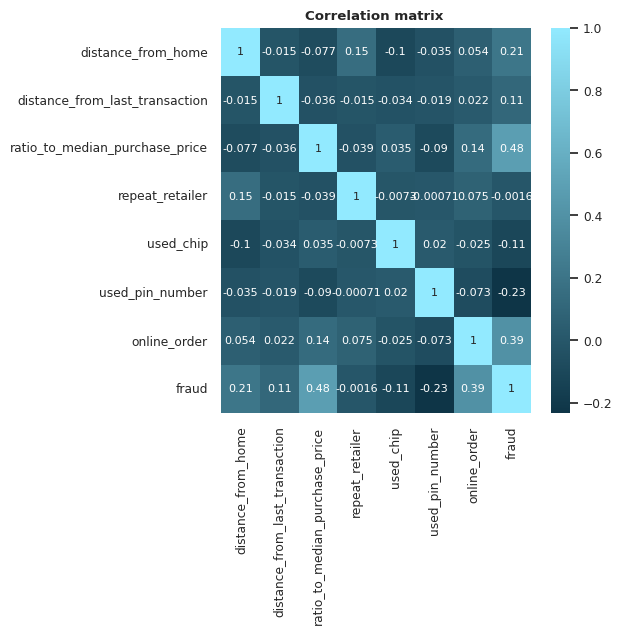

In [30]:
colors = ["#0E3547", "#92EAFF"]
cmap = LinearSegmentedColormap.from_list('Custom', colors, N=256)

plt.figure(figsize=(5,5))
sns.set(style="whitegrid", context="notebook", font_scale=0.8)
sns.heatmap(df_resampled.corr(), cmap=cmap, annot=True, annot_kws={"size": 8})
plt.title("Correlation matrix ", fontweight='bold')
plt.show()

There is a positive correlation with respect to the objective variable "fraud" in the variables:
* ratio_to_median_purchase_price
* online_order
  
And a negative relationship with:
* used_pin_number

#### Outlier detection

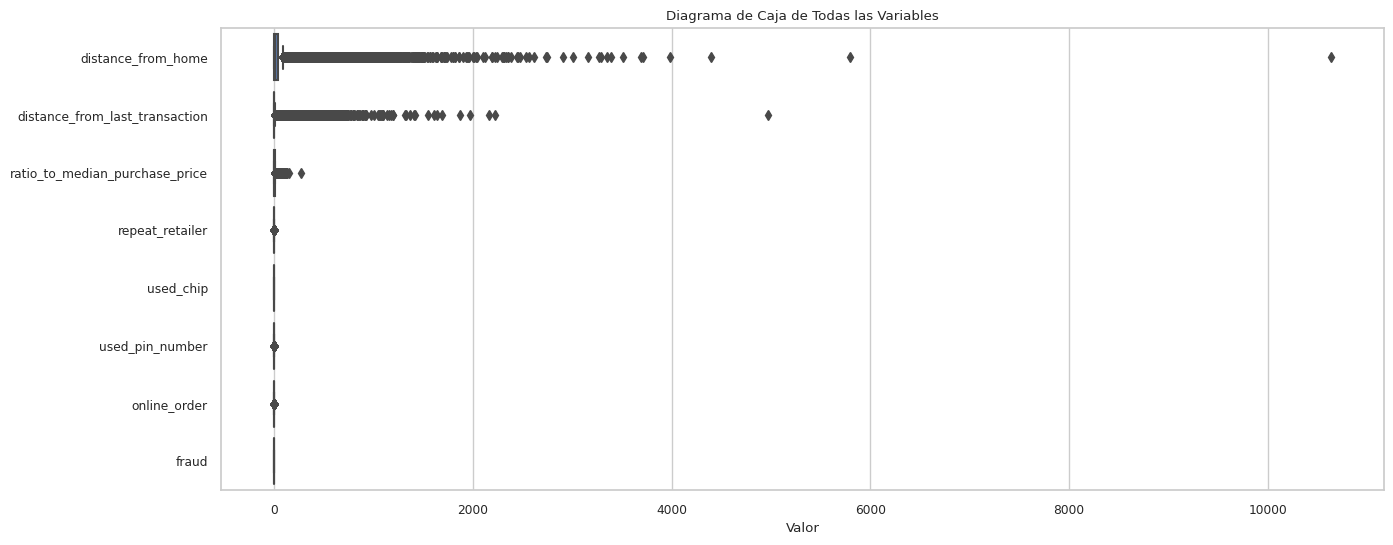

In [50]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=df_resampled, orient="h")  
plt.title("Diagrama de Caja de Todas las Variables")
plt.xlabel("Valor")
plt.show()